In [8]:
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv(r"boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
class LinearRegression:
    
    def __init__(self, alpha, times):
        '''初始化
        
        parameters
        ----
        alpha:float 学习速率
        
        times:int 迭代次数
        '''
        
        self.alpha = alpha
        self.times = times
        
        
    def fit(self, X, y):
        '''训练Ｘ
        
        Parameters
        ---
        X:[样本数量，样本特征]
        
        y:[样本数量]
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        
        # 创建初始权重，全部设置0，多一个截距权重
        self.w_ = np.zeros(1 + X.shape[1])
        
        # 创建loss列表  （预测值 - 真实值）的平方和除以二
        self.loss_ = []
        
        # 进行循环
        for i in range(self.times):
            # 计算预测值
            y_hat = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算预测值和真实值的差距
            error = y - y_hat
            # 将损失值加入到损失列表当中
            self.loss_.append(  np.sum(error ** 2) / 2 )
            # 调整w向梯度相反的方向: 权重(j) = 权重(j) + 学习率 * sum((y - y_hat) * x(j))
            # loss（所有数据集的error总和）对每一个w求导，即是w应该变化的方向
            # y_hat对w求导的时候，得到的是负的x(j)，由于权重 = 权重 - 权重变化率，所以负负得正，变成加号
            self.w_[0] += self.alpha * np.sum(error)
            self.w_[1:] += self.alpha * np.dot(X.T, error)
            
    def predict(self, X):
        '''预测
            
            Parameters
            ----
            X:[样本数量，样本特征]
            
            Returns
            ---
        result: 数组 '''
        
        X = np.asarray(X)
        result = np.dot(X, self.w_[1:]) + self.w_[0]
        return result

In [34]:
lr = LinearRegression(alpha=0.001, times=20)
t = data.sample(len(data), random_state=0)

#数据分组
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr.fit(train_X, train_y)
result = lr.predict(test_X)

display(np.mean((result-test_y) ** 2))

2.7791861319538473e+206

In [35]:
class StandardScaler:
    '''标准化'''
    
    def fit(self, X):
        '''根据传递的样本，计算每个特征列的均值与标准差
        
        Parameters
        ----
        X:类数组
        '''
        
        X = np.asarray(X)
        self.std_ = np.std(X, axis=0)
        self.mean_ = np.mean(X, axis=0)
        
    def transform(self, X):
        '''将每一列都标准化处理，每一列都变成标准正态分布'''
        
        return (X-self.mean_) / self.std_
    
    def fit_transform(self, X):
        '''结合'''
        
        self.fit(X)
        return  self.transform(X)

In [51]:
lr = LinearRegression(alpha=0.0005, times=20)
t = data.sample(len(data), random_state=0)

#数据分组
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

#标准化
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X, train_y)

result = lr.predict(test_X)

display(np.mean((result-test_y) ** 2))
display(lr.loss_)
display(lr.w_)

0.20336064576087076

[200.0,
 107.166079149246,
 88.91896294017967,
 79.79699900354937,
 74.33495874650424,
 70.91957416161512,
 68.7061649307762,
 67.21401040114299,
 66.1640222876996,
 65.39167226769374,
 64.79841173790199,
 64.32419686701928,
 63.931764580828826,
 63.597523544384345,
 63.306210404187205,
 63.047713962968146,
 62.81516249070354,
 62.60375602352479,
 62.4100435515406,
 62.23146925589151]

array([ 1.55653268e-16, -7.71128657e-02,  3.26567796e-02, -4.17268297e-02,
        7.24609817e-02, -1.22576315e-01,  3.18442051e-01, -9.42920843e-03,
       -2.09339731e-01,  1.03687319e-01, -5.22107348e-02, -1.82317645e-01,
        9.83898220e-02, -3.94766865e-01])

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置中文显示
mpl.rcParams["font.family"] = "Droid Sans Fallback"
mpl.rcParams["axes.unicode_minus"] = False

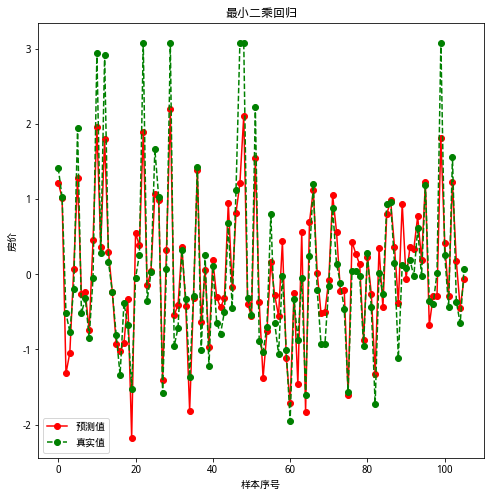

In [53]:
plt.figure(figsize=[8,8])
#绘制预测值
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go--", label="真实值")
plt.title("最小二乘回归")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

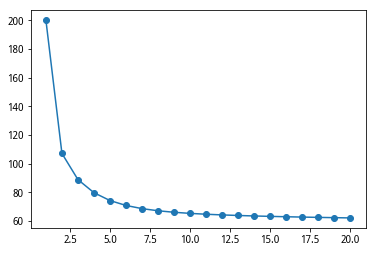

In [57]:
#累计的误差值
plt.plot(range(1, lr.times +1), lr.loss_, "o-")

In [65]:
lr = LinearRegression(alpha=0.0005, times=50)
t = data.sample(len(data), random_state=0)

#数据分组
train_X = t.iloc[:400, 5:6]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, 5:6]
test_y = t.iloc[400:, -1]

#标准化
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X, train_y)

result = lr.predict(test_X)

display(np.mean((result-test_y) ** 2))
#display(lr.loss_)
#display(lr.w_)

0.46071758937162166

array([-3.07753822e-16,  6.54984608e-01])

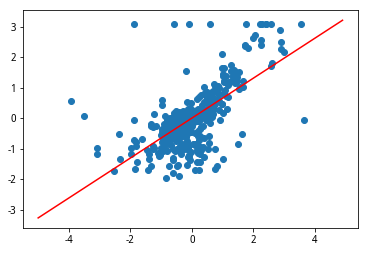

In [69]:
plt.scatter(train_X["RM"], train_y)
display(lr.w_)

x = np.arange(-5, 5, 0.1)

y = 3.07753822e-16 + 6.54984608e-01 * x
plt.plot(x, y, "r")